In [141]:
# import libraries and load the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel(r"C:\Users\khanu\Documents\classexcelr\assignment downloads\Clustering\EastWestAirlines.xlsx",sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
# summary statistics
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [143]:
df.shape

(3999, 12)

In [11]:
# check for null values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

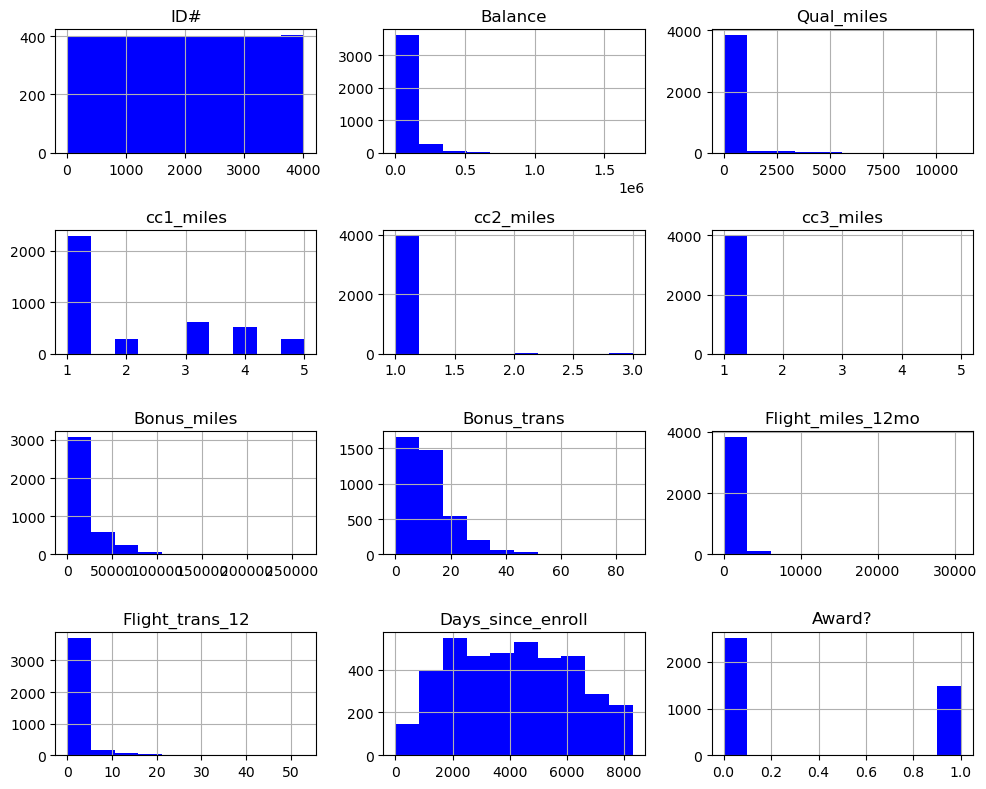

In [26]:
# plotting histogram 
df.hist(figsize=(10,8),color='Blue')
plt.tight_layout()
plt.show()

<Figure size 1200x900 with 0 Axes>

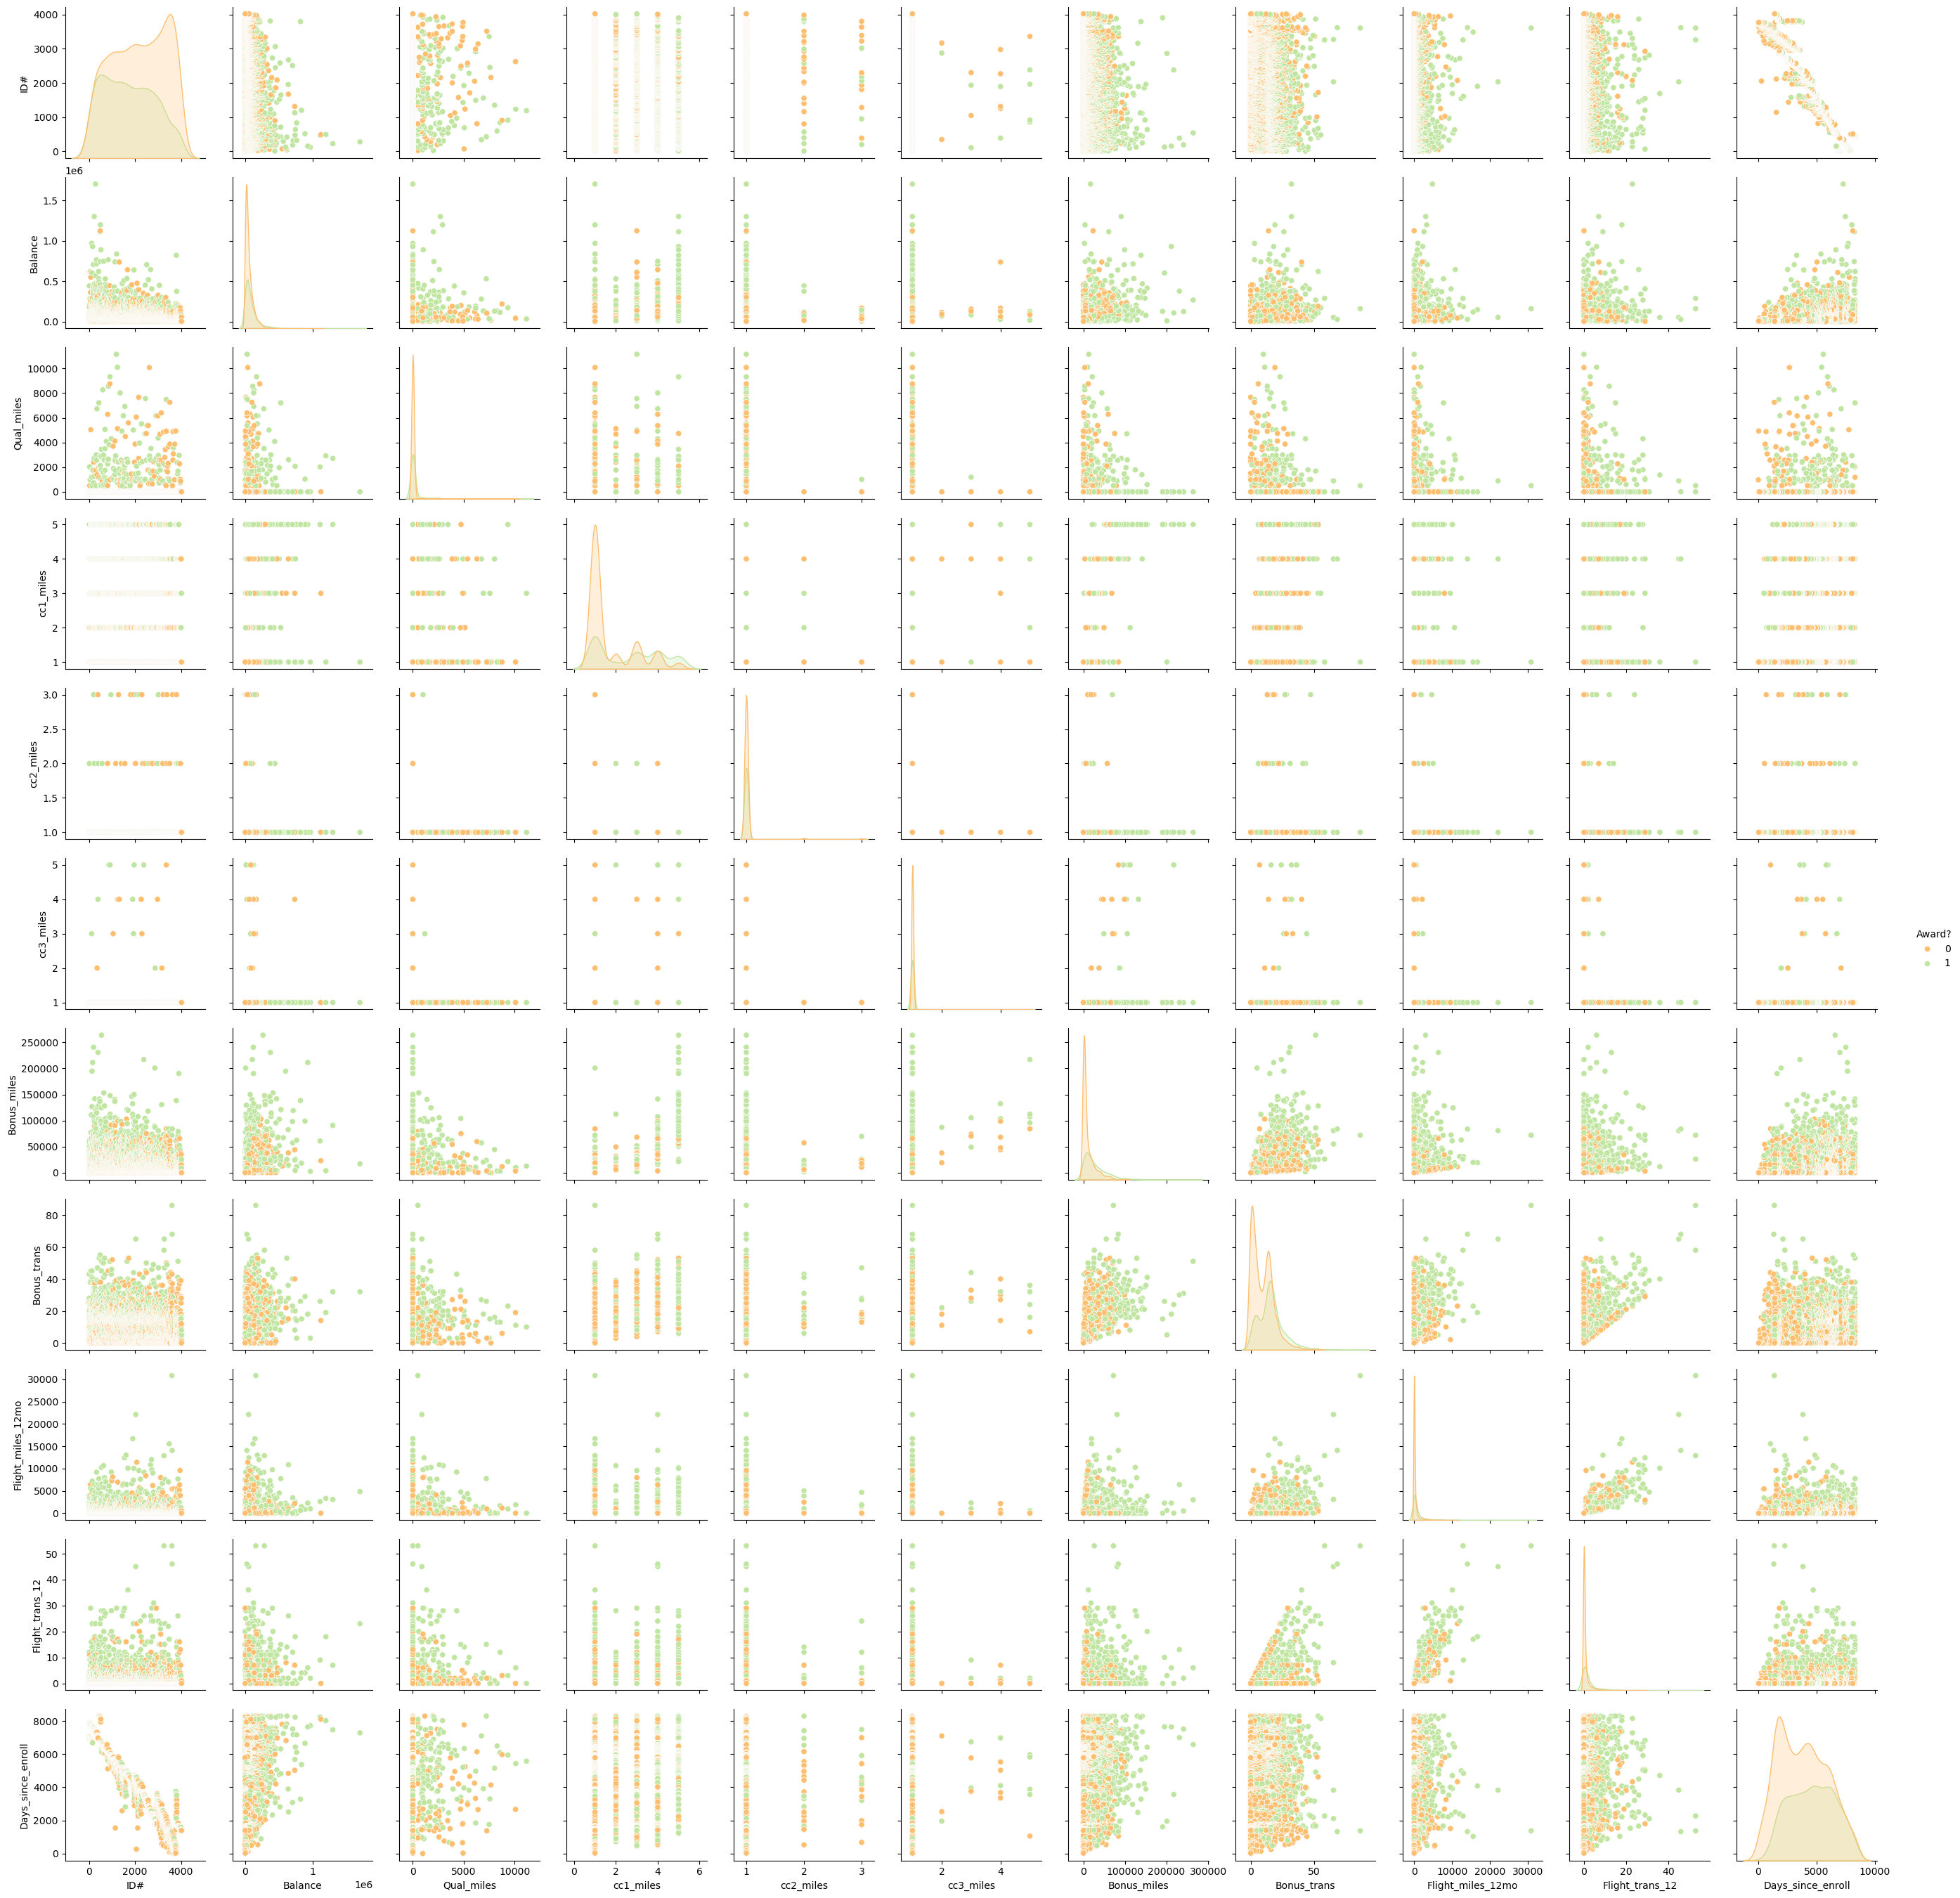

In [38]:
# plotting pairplot to check the relationship between the variables
plt.figure(figsize=(12,9))
sns.pairplot(df,palette='Spectral',hue='Award?')
plt.show()

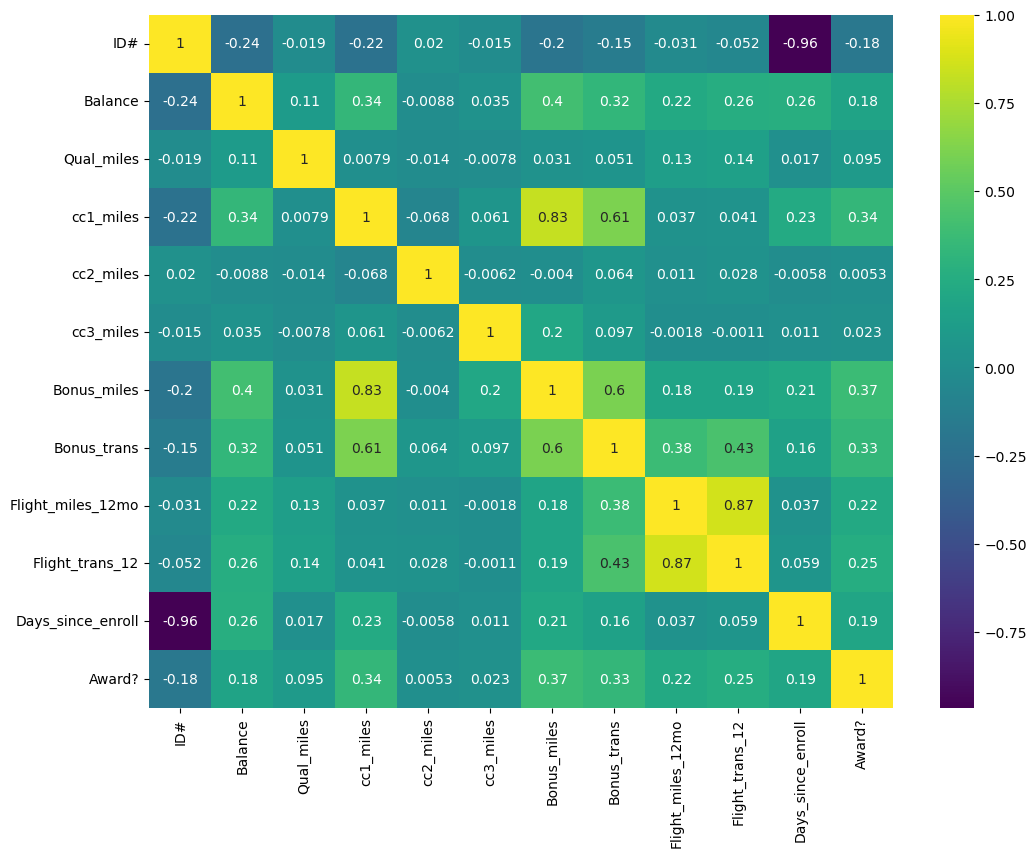

In [34]:
# heatmap to check correlation between the variables
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

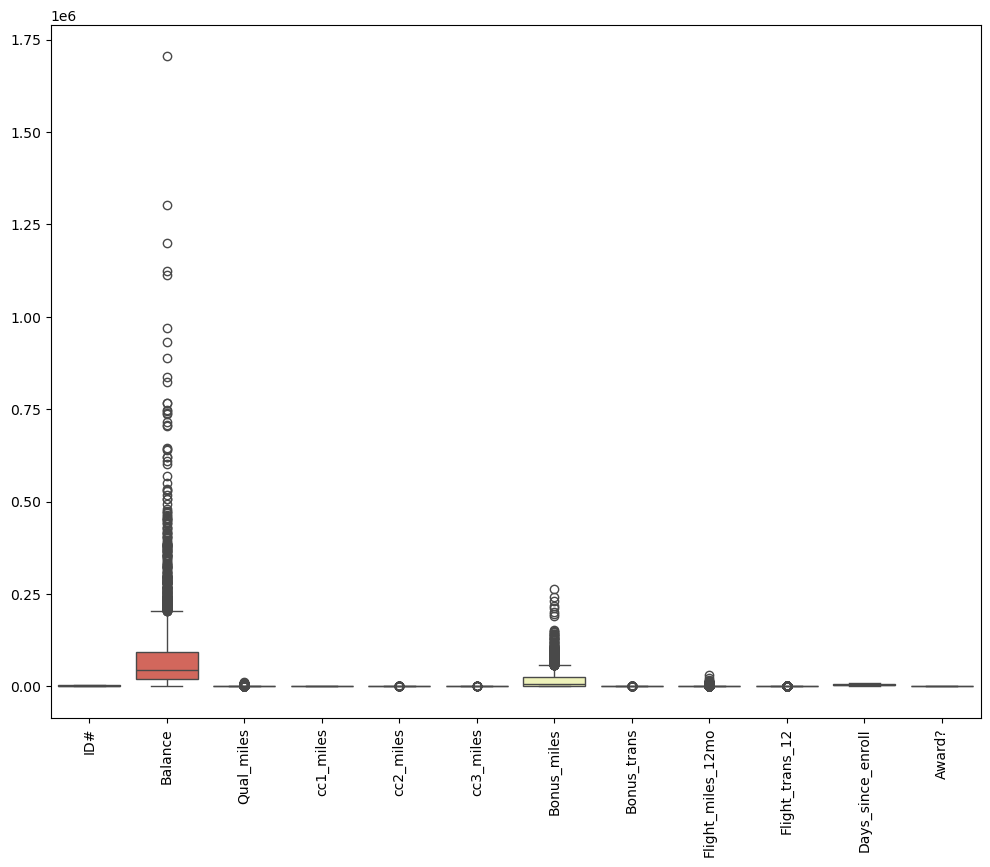

In [39]:
# plotting box plot to check for outliers
plt.figure(figsize=(12,9))
sns.boxplot(df,palette='Spectral')
plt.xticks(rotation =90)
plt.show()

In [145]:
import numpy as np
# detecting the outliers using IQR method
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)

IQR= Q3 - Q1
lower=Q1 - 1.5 * IQR
upper=Q3 + 1.5 * IQR
outliers=((df<lower)| (df> upper))
outliers.sum()

ID#                    0
Balance              266
Qual_miles           226
cc1_miles              0
cc2_miles             43
cc3_miles             18
Bonus_miles          280
Bonus_trans           63
Flight_miles_12mo    569
Flight_trans_12      565
Days_since_enroll      0
Award?                 0
dtype: int64

In [147]:
# Treating outliers

# Removing rows with outliers
df = df[~((df < lower) | (df > upper)).any(axis=1)]

df.shape

(2875, 12)

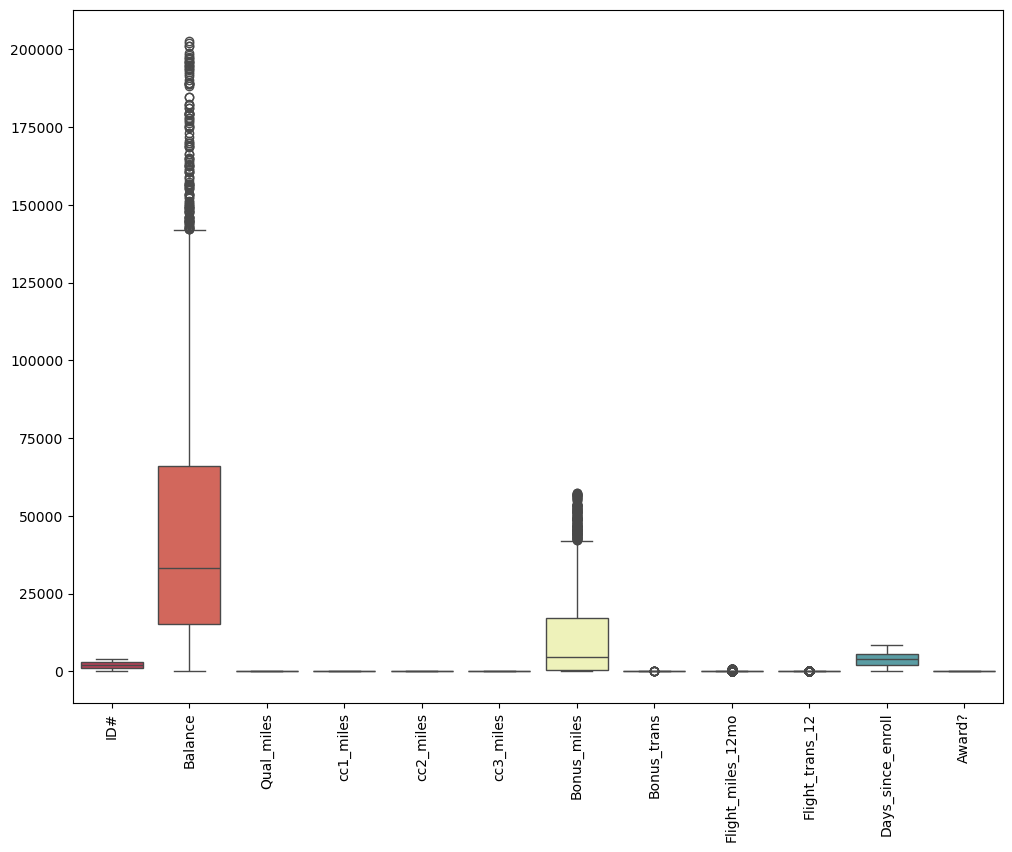

In [151]:
# plotting box plot to check for outliers
plt.figure(figsize=(12,9))
sns.boxplot(df,palette='Spectral')
plt.xticks(rotation =90)
plt.show()

In [153]:
# feature scaling so that all the variables are on the same scale
from sklearn.preprocessing import StandardScaler

scaled=StandardScaler()
df_scaled=scaled.fit_transform(df)

### K Means Clustering

In [155]:
from sklearn.cluster import KMeans

sse=[]
silhouette_scores = []
k_values = range(2, 11)  # K from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
    
    # Calculate silhouette score for each K
    clusters = kmeans.predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    silhouette_scores.append(silhouette_avg)


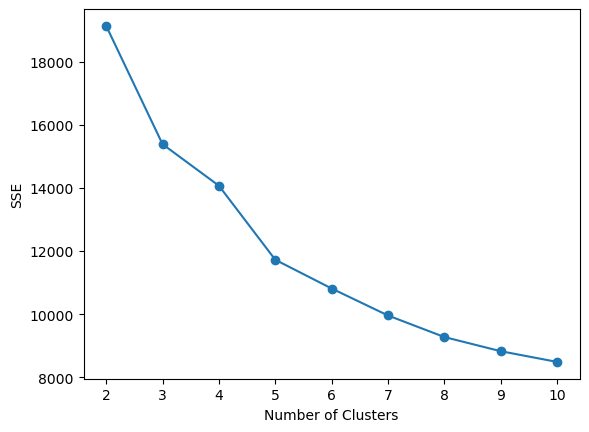

In [156]:
# plotting elbow curve
plt.plot(k_values,sse,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [167]:
optimal_k=3
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
clusters=kmeans.fit_predict(df_scaled)

In [169]:
# evaluating the model using silhouette score
from sklearn.metrics import silhouette_score

silhouette=silhouette_score(df_scaled,clusters)
print(f'Silhouette score : {silhouette}')

Silhouette score : 0.30830264215957265


In [171]:
centroids=kmeans.cluster_centers_
print(f'Centroids for kmeans:\n {centroids}')

Centroids for kmeans:
 [[-0.07265457  0.43073018  0.          0.18816805  0.          0.
   0.24954578  0.30185492  2.42065252  2.27604824  0.08497532  0.36441803]
 [ 0.20553786 -0.42916685  0.         -0.64421776  0.          0.
  -0.59350178 -0.5193725  -0.35211824 -0.34194859 -0.21697001 -0.31678615]
 [-0.35824821  0.63224909  0.          1.13927049  0.          0.
   1.01796655  0.85618248 -0.33904964 -0.29826429  0.37473863  0.44740405]]


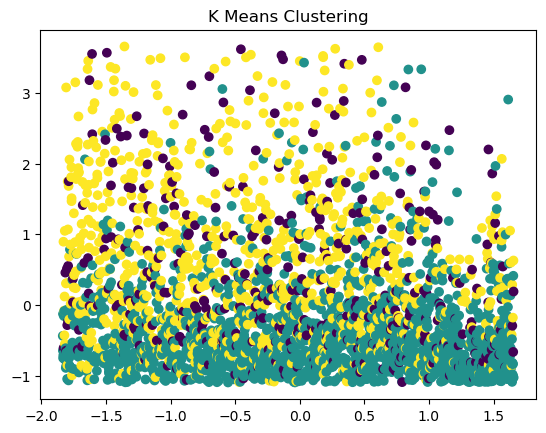

In [173]:
# visualizing kmeans clustering

plt.scatter(df_scaled[:,0],df_scaled[:,1],cmap='viridis',c=clusters)
plt.title('K Means Clustering')
plt.show()

### Heirarchical Clustering

In [175]:
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
linked=sch.linkage(df_scaled,method='ward')

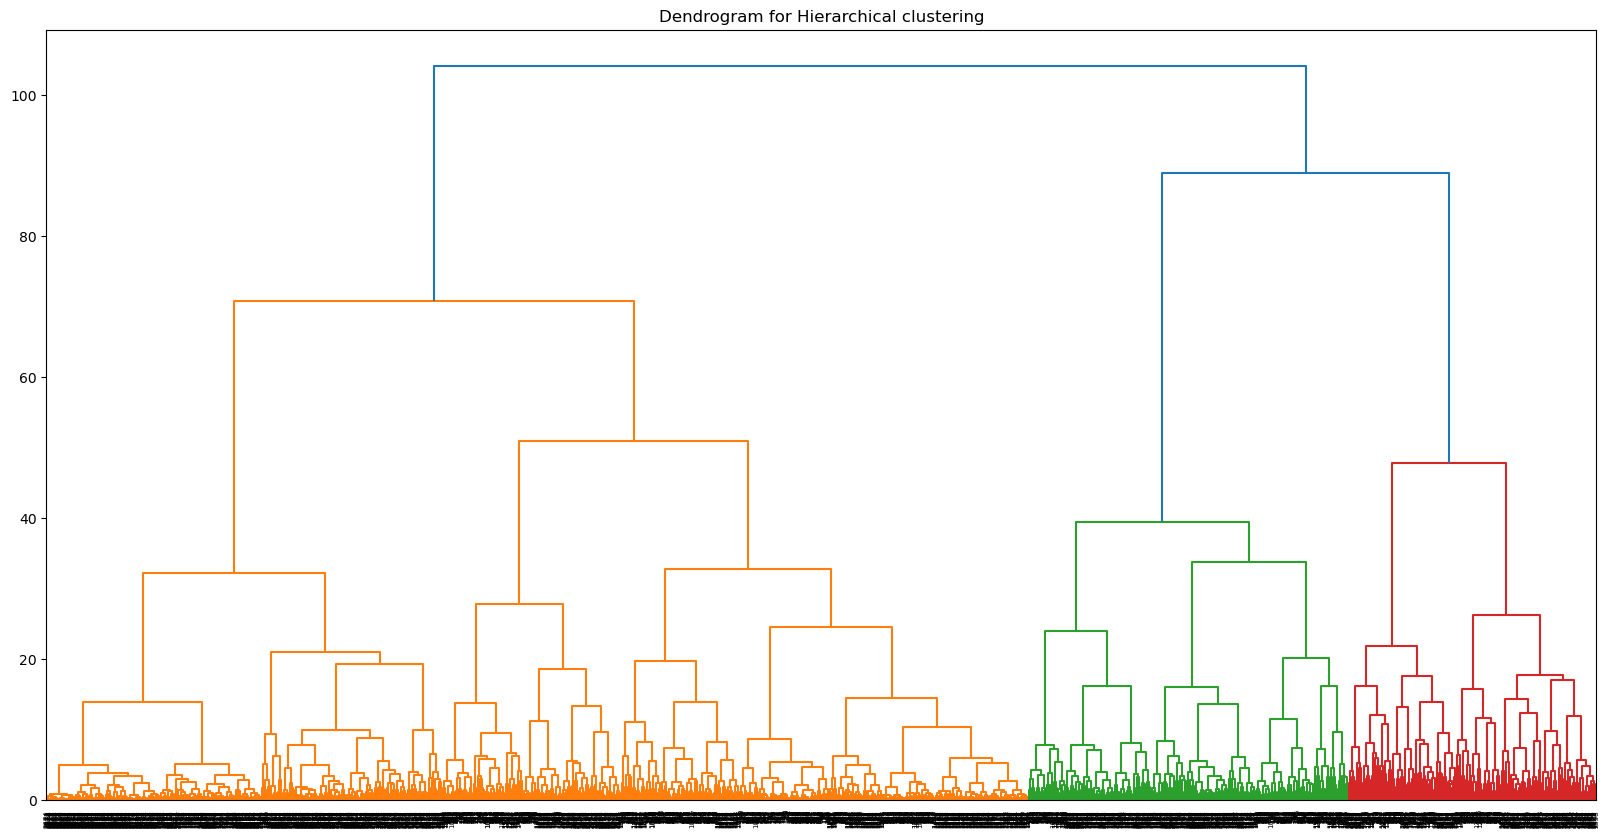

In [177]:
# plot dendrogram
plt.figure(figsize=(20,10))
sch.dendrogram(linked)
plt.title('Dendrogram for Hierarchical clustering')
plt.show()

### DBSCAN Clustering

In [197]:
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=0.3,min_samples=10,metric='euclidean')
db_clusters=db.fit_predict(df_scaled)

In [199]:
from sklearn.metrics import silhouette_score

silhouette=silhouette_score(df_scaled,db_clusters)
print(f'Silhouette score : {silhouette}')

Silhouette score : -0.11562137068241


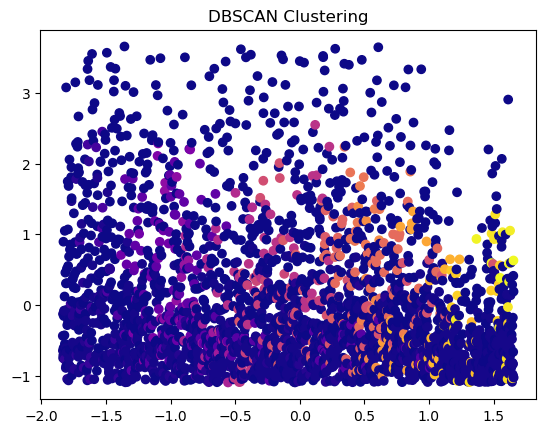

In [183]:
# visualizing kmeans clustering

plt.scatter(df_scaled[:,0],df_scaled[:,1],cmap='plasma',c=db_clusters)
plt.title('DBSCAN Clustering')
plt.show()